In [2]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

In [60]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)
    return m-h,m, m+h#,h

# Задания для самостоятельного решения


### 1. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

In [44]:
sigma = 25
Z = 1.96  # 95%
delta = 3

N = int(((sigma*Z)/delta)**2)
print(f'Минимальный объём выборки для заданных условий: {N}')


Минимальный объём выборки для заданных условий: 266


### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

In [45]:
import scipy.stats as stats

population_men = stats.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165

t, p = stats.ttest_ind(population_men, population_women)

print("t = " + str(t))
print("p = " + str(p))

t = 1.4290428128784622
p = 0.15299195691444753


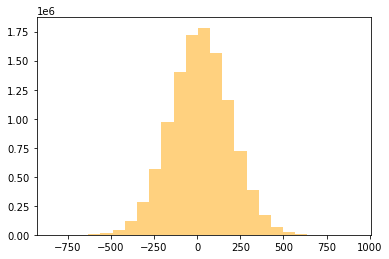

In [74]:
plt.hist(population_men, color='orange', alpha=0.5, bins=25);

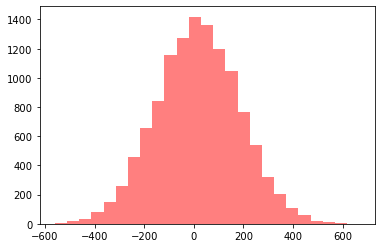

In [76]:
plt.hist(population_women, color='red', alpha=0.5, bins=25);

3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

In [48]:
sigma = 150
Z = 1.96  # 95%
delta = 50

N = int(((sigma*Z)/delta)**2)
print(f'Минимальный объём выборки для заданных условий: {N}')


Минимальный объём выборки для заданных условий: 34


### 4.  Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, 
если уровнь значимости принять за 0.05 ?

In [49]:
observations = pd.DataFrame([[25,36],[15,44]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,25,36
Солнце,15,44


In [57]:
import scipy as sp
oddsratio, pvalue = sp.stats.fisher_exact(observations) # Возможно вам пригодится эта функция.
print(f"p = {pvalue}")

p = 0.08323639416753109


В данном случае p-value выше, чем принятый уровень значимости. Значит нулевую гипотезу, о том что волшебник шарлатан, следует принять.

### 5. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки: data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]


In [62]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

mean_confidence_interval(data, confidence=0.90)

(6.074074746111319, 6.628571428571429, 7.183068111031539)

### 6. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

In [77]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

t, p = stats.ttest_ind(data_1 ,data_2)
t, p

(7.35744682757447, 2.1159475572725764e-11)

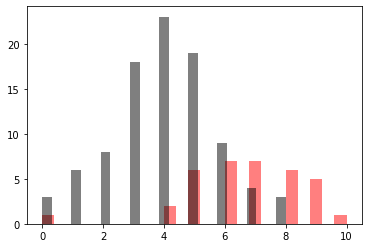

In [78]:
plt.hist(data_1, color='red', alpha=0.5, bins=25);
plt.hist(data_2, color='black', alpha=0.5, bins=25);

Определяем p-value и получаем очень малое значение. Это даёт нам все основания для того, чтобы отклонить нулевую гипотезу (о сходстве выборок) и утверждать обратное.

In [94]:
data_2 = np.array(data_2)
stats.ttest_1samp(a=data_1, popmean=data_2.mean())

Ttest_1sampResult(statistic=8.107648536812547, pvalue=1.8719811897237842e-09)

### 7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

Предположим, Вы сформировали две гипотезы:
Нулевая гипотеза - распределение нормальное, 
Альтернативная гипотеза - распределение не нормальное.


Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03.
Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

Ответ: p-value меньше 5% - нулевая гипотеза отклонена, принимаем альтернативную. Распределение не нормальное

### 8. Первая выборка — это пациенты, которых лечили препаратом А. 
Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

b) При каком минимальном P-values различия были бы уже значимы? 

In [90]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)

t, p = stats.ttest_ind(a=A, b=B, equal_var=False)
t, p

(0.33196234898293125, 0.7400341626811637)

Полученное p-value говорит о схожести выборок: различия между действиями двух препаратов случайны. При p-value меньше уровня значимости различия были бы уже значимы: при p-value < 5%.